In [2]:

import kagglehub
paradisejoy_top_hits_spotify_from_20002019_path = kagglehub.dataset_download('paradisejoy/top-hits-spotify-from-20002019')

print('Data source import complete.')


Data source import complete.


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        SPOTIFY DATA VISUALIZATION
    </h3>
    </div>

<p>Spotify transformed music listening forever when it launched in Sweden in 2008. Discover, manage and share over 70m tracks for free, or upgrade to Spotify Premium to access exclusive features including offline mode, improved sound quality, and an ad-free music listening experience.

Today, Spotify is the most popular global audio streaming service with 365m users, including 165m subscribers across 178 markets. They are the largest driver of revenue to the music business today.</p>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        TABLE OF CONTENTS
    </h3>
    </div>
  
  
<br>
<br>
<br>

<p>
    <b>1. IMPOPRTING LIBRARIES AND LOADING DATA</b>
</p>
<p>
    <b>2. DATA INFORMATION </b>
</p>
<p>
    <b>3. EXPLORATORY DATA ANALYSIS </b>
</p>
<p>
    <b>4. CONCLUSION </b>
</p>
<p>
    <b>5. END </b>
</p>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING LIBRARIES AND LOADING DATA
    </h3>
    </div>

In [3]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

# The path where kagglehub downloads the dataset is stored in this variable
df_path = paradisejoy_top_hits_spotify_from_20002019_path + '/songs_normalize.csv'

# Use the correct path to read the csv file
df=pd.read_csv(df_path)

In [4]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        DATA INFORMATION
    </h3>
    </div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


<div style="color:black;
            display:fill;
            border-radius:1px;
            background-color:lightyellow;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    
* <b>artist</b>: Name of the Artist.<br>
* <b>song</b>:   Name of the Track.<br>
* <b>duration_ms</b>: Duration of the track in milliseconds.<br>
* <b>explicit</b>: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.<br>

* <b>year</b>: Release Year of the track.<br>
* <b>popularity</b>: The higher the value the more popular the song is.<br>
* <b>danceability</b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
    
* <b>energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.<br>
* <b>key</b>: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.<br>

* <b>loudness</b>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.<br>

* <b>mode</b>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br>

* <b>speechiness</b>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br>

* <b>acousticness</b>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>

* <b>instrumentalness</b>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br>

* <b>liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>

* <b>valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>

* <b>tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br>

* <b>genre</b>: Genre of the track.<br>
    
    </div>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        EXPLORATORY DATA ANALYSIS
    </h3>
    </div>

In [6]:
# checking for null values
df.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [7]:
#checking for duplicate values
df.duplicated().value_counts()

,count
False,1941
True,59


In [8]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [9]:
#shape of the dataset
df.shape

(1941, 18)

In [10]:
# Description of the Data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [11]:
print(df.select_dtypes(include=np.number).columns)


Index(['duration_ms', 'year', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')


In [12]:
pip install --upgrade plotly


In [13]:
fig=px.imshow(df.select_dtypes(include=np.number).corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>pairwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

In [14]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

In [15]:
fig=px.area(df.groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',markers=True,labels={'song':'Total songs'},color_discrete_sequence=['green'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)

In [16]:
fig=px.histogram(df.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',y='song',color_discrete_sequence=['green'],template='plotly_dark',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)

In [17]:
fig=px.histogram(df.groupby('genre',as_index=False).sum().sort_values(by='popularity',ascending=False),x='genre',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',marginal='box',title='<b>Popular genres based on pouplarity</b>')
fig.update_layout(title_x=0.5)

In [18]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> List of Songs Recorded by Each Singer')

In [19]:
px.bar(df.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(30),x='artist',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',text='popularity',title='<b>Top 30 Popular Singers')

In [20]:
fig=px.line(df.sort_values(by='popularity',ascending=False).head(25),x='song',y='popularity',hover_data=['artist'],color_discrete_sequence=['green'],markers=True,title='<b> Top 25 songs in Spotify')
fig.show()

In [21]:
fig=px.treemap(df,path=[px.Constant('Singer'),'artist','genre','song'],values='popularity',title='<b>TreeMap of Singers Playlist')
fig.update_traces(root_color='lightgreen')
fig.update_layout(title_x=0.5)

In [22]:
fig=px.pie(df.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['green','crimson'],template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

In [23]:
fig=px.area(df[df['explicit']==True].groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',labels={'song':'Total songs'},markers=True,color_discrete_sequence=['red'],template='plotly_dark',title='<b>Yearwise explicit content songs')
fig.update_layout(hovermode='x')

In [24]:
px.box(df,x='explicit',y='popularity',color='explicit',template='plotly_dark',color_discrete_sequence=['cyan','magenta'],title='<b>popularity based on explicit content')

In [25]:
px.scatter(df,x='tempo',y='popularity',color='tempo',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b>Tempo Versus Popularity')

In [26]:
px.scatter(df,x='speechiness',y='popularity',color='speechiness',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Speechiness Versus Popularity')

In [27]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy Versus Danceability')

In [28]:
px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy versus Loudness correlation')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        CONCLUSION
    </h3>
    </div><br><br>
<h7>From the Analysis, we can conclude that the most popular genre in the music market is pop.
According to the musicians, pop music is inherently popular because it creates a sense of familiarity for listeners. Therefore, when they hear the same 'woop' throughout the genre, they're more inclined to ease into a piece of music they've never heard because it sounds familiar.

Almost 28% of Songs contains Explicit Content and on coming to popularity, explicit content songs Has high median popularity.
    
The top 3 singers who recorded maximum songs in their album are Rihanna, Drake and Eminem. Top 3 popular Singers in Spotify are<br><a href='https://open.spotify.com/artist/5pKCCKE2ajJHZ9KAiaK11H?autoplay=true' style='text-decoration:none'>Rihanna   </a>,<a href='https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR?autoplay=true' style='text-decoration:none'> Eminem</a> and <a href='https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4?autoplay=true' style='text-decoration:none'>Drake </a>.

Top 3 popular songs to check out are <br><br><a href='https://open.spotify.com/track/5FiHhop5lURiKgpFRHU3QC?autoplay=true' style='text-decoration:none'>1. Sweather Weather</a> by The Neighbourhood<br> <a href='https://open.spotify.com/track/3B8AjxvLomrKgKwWMCNn31?autoplay=true' style='text-decoration:none'>2. Another Love</a> by Tom Odell<br><a href='https://open.spotify.com/track/7lQ8MOhq6IN2w8EYcFNSUk?autoplay=true' style='text-decoration:none'>3. Without Me</a> by Eminem.
</h7>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        END
    </h3>
    </div>

## 🔁 Enhanced Correlation Heatmap with Masked Upper Triangle

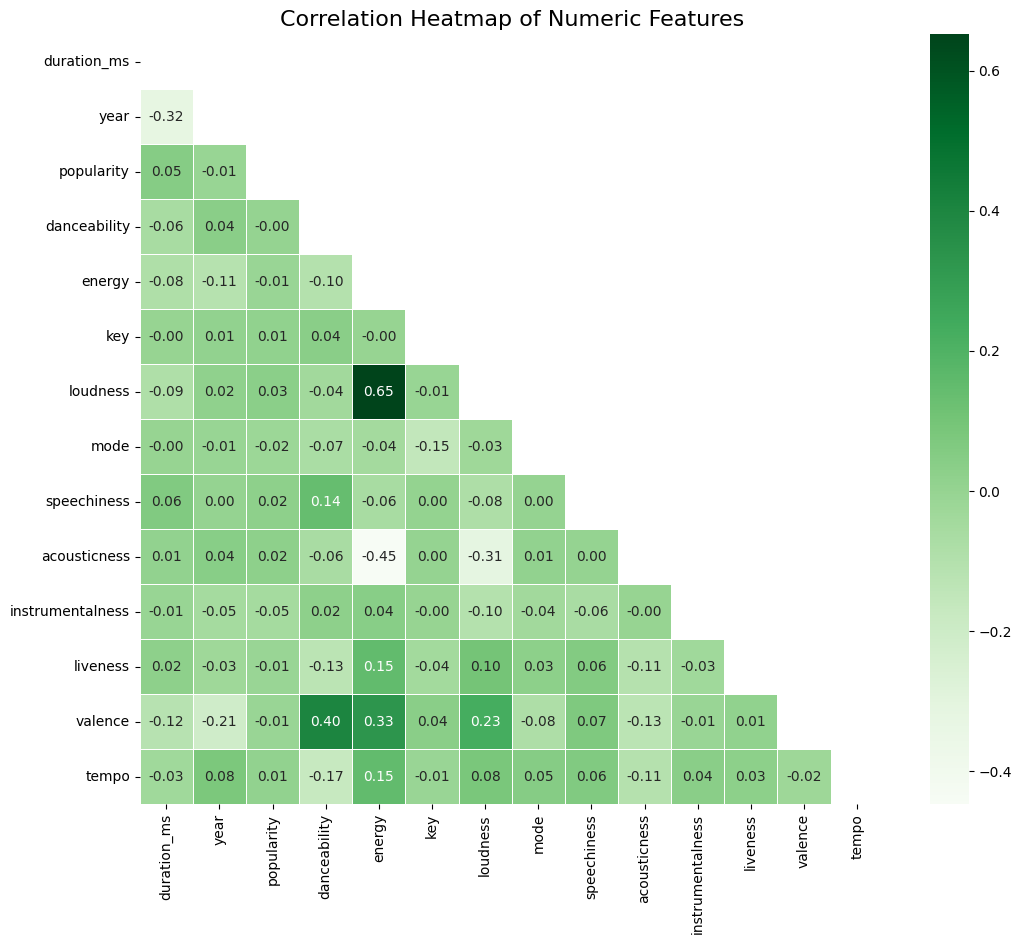

In [29]:

plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='Greens', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


## 📊 Danceability vs Popularity by Genre

In [32]:
fig = px.scatter(df, x='popularity', y='danceability', color='genre',
                 title='Danceability vs Popularity Colored by Genre', hover_data=['song'])
fig.show()

## 📈 Popularity Trend Over Time

In [34]:

popularity_year = df.groupby('year')['popularity'].mean().reset_index()

fig = px.line(popularity_year, x='year', y='popularity', title='Average Popularity Over Years')
fig.show()

## 🎹 Audio Features Radar Chart

In [35]:

def plot_radar(song_name):
    features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
    track = df[df['track_name'] == song_name].iloc[0]
    values = [track[feat] for feat in features]

    fig = go.Figure(data=go.Scatterpolar(r=values, theta=features, fill='toself'))
    fig.update_layout(title=f'Audio Features Radar: {song_name}', polar=dict(radialaxis=dict(visible=True)))
    fig.show()

# Example: plot_radar("Shape of You")  # Use a valid track name from the dataset
